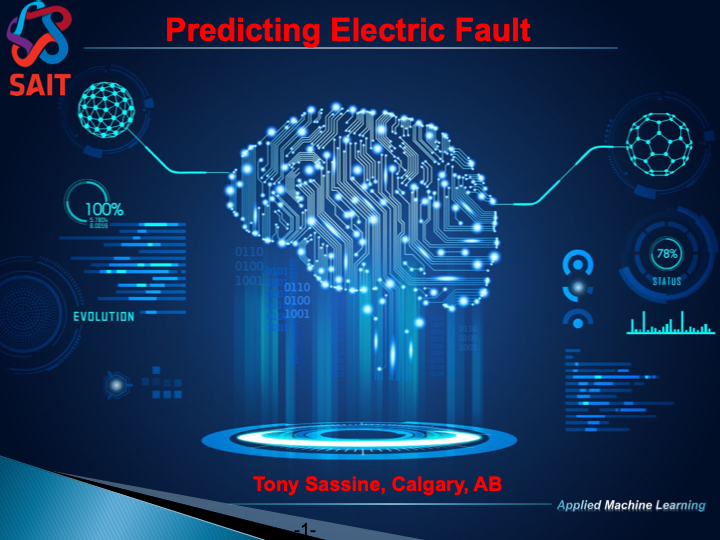

https://www.kaggle.com/datasets

__Introduction to Electrical Faults__

An electrical fault is the deviation of voltages and currents from nominal values or states. Under normal operating conditions, power system equipment or lines carry normal voltages and currents which results in safer operation of the system.


__Features of Electric Fault:__

date_of_trip; time_of_trip;  weather;  line_trip;  load_of_line;  voltage;  frequency;  date of restoration;  time_of_restoration;  repair_carried;  tripping_reason;  type_of_fault;  nature



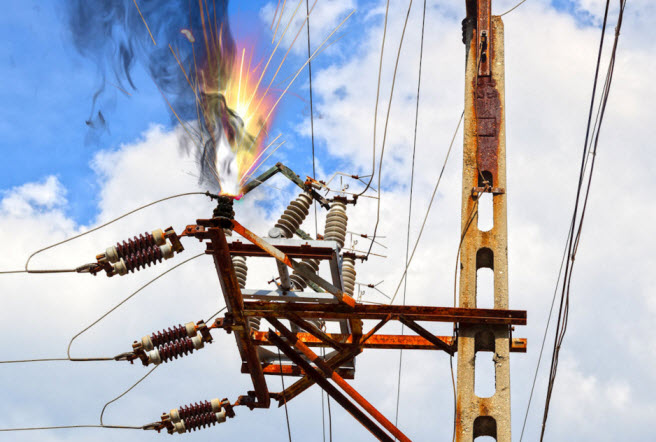



__"Types of Faults" & Their Effects varies from "Low, Medium, and High"__

__The effects of electrical faults mainly occur because of the following reasons.__

__Over Current Flow__

When the fault occurs, it creates a very low impedance path for the current flow. This results in a very high current being drawn from the supply, causing the tripping of relays, damaging insulation and components of the equipment.

__Danger to Operating Personnel__

Fault occurrence can also cause shocks to individuals. The severity of the shock depends on the current and voltage at the fault location and even may lead to death.

__Loss of Equipment__

Heavy current due to short circuit faults results in the components being burnt completely which leads to improper working of equipment or device. Sometimes heavy fire causes complete burnout of the equipment.

__Disturbs Interconnected Active Circuits__

Faults not only affect the location at which they occur but also disturb the active interconnected circuits to the faulted line.

__Electrical Fires__

Short circuit causes flashovers and sparks due to the ionization of air between two conducting paths which further leads to fire as we often observe in news such as building and shopping complex fires.

__So the target feature important --> "type_of_fault__


In [1]:
import pandas as pd 
import matplotlib as plt
from matplotlib import pyplot
import matplotlib.pyplot as plt # Plotting
import numpy as np # linear algebra
import seaborn as sns #statistical graphics
from matplotlib import *
import warnings
warnings.filterwarnings('ignore')
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
from sklearn.svm import SVC
import scikitplot as skplt
import json

In [2]:
#loading the dataset
dataset = pd.read_csv("electric_faults_data.csv")
df = pd.read_csv("electric_faults_data.csv")

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date_of_trip         38 non-null     object 
 1   time_of_trip         38 non-null     object 
 2   weather              38 non-null     object 
 3   other_circuit        37 non-null     object 
 4   line_trip            38 non-null     object 
 5   load_of_line         38 non-null     int64  
 6   voltage              38 non-null     int64  
 7   frequency            38 non-null     float64
 8   other_line_status    0 non-null      float64
 9   date of restoration  38 non-null     object 
 10  time_of_restoration  38 non-null     object 
 11  observation          4 non-null      object 
 12  repair_carried       17 non-null     object 
 13  tripping_reason      37 non-null     object 
 14  type_of_fault        38 non-null     object 
 15  nature               38 non-null     objec

In [4]:
import pandas_profiling as pp
pp.ProfileReport(df)

Summarize dataset:   0%|          | 0/30 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:

#returns stastistical summary of the data frame
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
load_of_line,38.0,123.236842,46.066599,50.00,99.75,122.00,154.5000,230.00
voltage,38.0,231.000000,7.162213,218.00,225.25,230.00,236.0000,244.00
frequency,38.0,49.852632,0.991395,43.92,49.98,50.03,50.0575,50.16
other_line_status,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
print(dataset.shape, dataset.ndim)

(38, 16) 2


In [7]:
sns.set_style('darkgrid')#Proposed themes: darkgrid, whitegrid, dark, white, and ticks

__Heatmap of Missing Values__

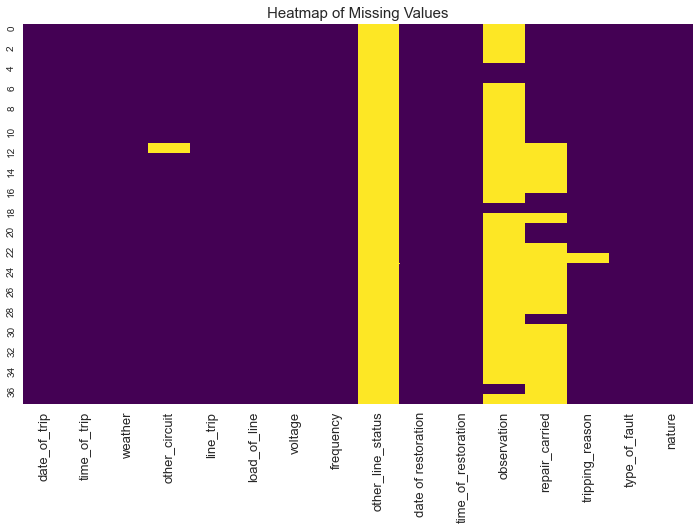

In [8]:
plt.figure(figsize=(12,7))
f = sns.heatmap(dataset.isnull(), cbar = False, cmap = 'viridis')
f.set_xticklabels(labels = f.get_xticklabels(), fontdict={'fontsize':13})
plt.title("Heatmap of Missing Values", fontsize = 15)
plt.show()

    Observations on the above heatmap:  the columns "other_line_status" has no values and "observation" has only few values so we can drop those.
    
    There is a few missing values in the tripping_reason & other_circuit columns.  So we will fill them with the most frequent values


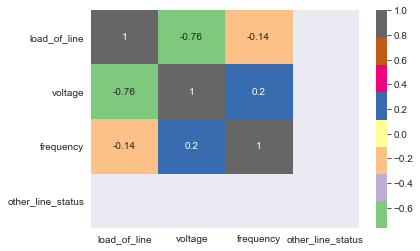

In [9]:
c = dataset.corr()#pairwise correlation of all columns in the dataset. Any na values are automatically excluded.
sns.heatmap(c,cmap="Accent",annot=True)
plt.show()

In [10]:
#return a Series containing counts of unique values
dataset['tripping_reason'].value_counts()

transient fault    11
bad weather        10
foreign element     4
fuse failure        3
breaker opened      2
earth fault         2
trip from kite      2
relay burn          2
wire fallen         1
Name: tripping_reason, dtype: int64

In [11]:
dataset['tripping_reason'].fillna(value = 'transient fault', inplace = True)

In [12]:
dataset['tripping_reason'].value_counts()

transient fault    12
bad weather        10
foreign element     4
fuse failure        3
breaker opened      2
earth fault         2
trip from kite      2
relay burn          2
wire fallen         1
Name: tripping_reason, dtype: int64

In [13]:
dataset['other_circuit'].value_counts()

healthy    37
Name: other_circuit, dtype: int64

Dropping "other_circuit" since, it doesn't contain usefull information, and having less entropy, in the model

    Entropy of a random variable is the average level of “information“, “surprise”, or “uncertainty” inherent in the variable’s possible outcomes.

In [14]:
#dataset['tripping_reason'].fillna(value = 'nil', inplace= True)
dataset['repair_carried'].value_counts()
dataset['repair_carried'].fillna(value = 'nil', inplace= True)

In [15]:
#remove Rows or Columns by specifying label names and corresponding axis
dataset.drop('other_line_status', inplace = True, axis  =1)
dataset.drop('observation', inplace = True, axis  =1)
dataset.drop('other_circuit', inplace = True, axis  =1)

In [16]:
#Confirm that above dropped columns are deleted
dataset

,date_of_trip,time_of_trip,weather,line_trip,load_of_line,voltage,frequency,date of restoration,time_of_restoration,repair_carried,tripping_reason,type_of_fault,nature
0,08-11-2017,5:39,cloudy,yes,71,237,49.87,08-11-2017,7:50,nil,bad weather,low,ABC
1,10-05-2017,15:56,cloudy,yes,187,220,49.98,10-05-2017,16:34,nil,transient fault,high,ABC
2,11-10-2017,12:35,clear,yes,124,229,49.94,11-10-2017,13:45,nil,foreign element,medium,ABC
3,18-06-2017,5:37,clear,yes,105,228,50.01,18-06-2017,6:17,nil,foreign element,medium,ABC
4,19-06-2017,6:30,rainy,yes,102,229,50.05,19-06-2017,7:18,feeder isolated,transient fault,medium,ABC
5,20-06-2017,17:04,cloudy,no,137,221,50.03,20-06-2017,17:10,relay removed,relay burn,medium,ABC
6,24-07-2017,11:32,cloudy,yes,173,220,49.98,24-07-2017,12:07,nil,transient fault,high,ABC
7,29-06-2017,13:51,cloudy,yes,180,227,50.03,29-06-2017,14:39,nil,foreign element,high,ABC
8,31-12-2017,7:38,foggy,yes,67,235,50.06,31-12-2017,9:26,nil,bad weather,low,ABC
9,11-06-2017,3:49,clear,no,146,232,50.01,11-06-2017,4:20,fuse,fuse failure,medium,ABC


__Seperate the Time__

In [17]:
#separating year
#syntax: datetime.strptime(date_string, format)
dataset['trip_year'] = pd.to_datetime(dataset['date_of_trip'], dayfirst= True ).dt.year
dataset['restore_year'] = pd.to_datetime(dataset['date of restoration'], dayfirst= True ).dt.year

In [18]:
#separating month
dataset['trip_month'] = pd.to_datetime(dataset['date_of_trip'], dayfirst= True ).dt.month
dataset['restore_month'] = pd.to_datetime(dataset['date of restoration'], dayfirst= True ).dt.month

In [19]:
#separating hours
dataset['trip_hour'] = pd.to_datetime(dataset['time_of_trip']).dt.hour
dataset['restore_hour'] = pd.to_datetime(dataset['time_of_restoration']).dt.hour

In [20]:
print("The shape of the data is :",dataset)

The shape of the data is :    date_of_trip time_of_trip      weather line_trip  load_of_line  voltage  \
0    08-11-2017         5:39       cloudy       yes            71      237   
1    10-05-2017        15:56       cloudy       yes           187      220   
2    11-10-2017        12:35        clear       yes           124      229   
3    18-06-2017         5:37        clear       yes           105      228   
4    19-06-2017         6:30        rainy       yes           102      229   
5    20-06-2017        17:04       cloudy        no           137      221   
6    24-07-2017        11:32       cloudy       yes           173      220   
7    29-06-2017        13:51       cloudy       yes           180      227   
8    31-12-2017         7:38        foggy       yes            67      235   
9    11-06-2017         3:49        clear        no           146      232   
10   11-06-2017         5:39        clear        no           135      233   
11   10-06-2017         7:30        c

__Map values of Series in according to time__

In [21]:
dataset['trip_month'] = dataset['trip_month'].map({1:'January', 2:'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July',
                               8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'})
dataset['restore_month'] = dataset['restore_month'].map({1:'January', 2:'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July',
                               8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'})
dataset['weekday'] = pd.to_datetime(dataset['date_of_trip']).dt.weekday
dataset['weekday'] = dataset['weekday'].map({0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'})

temp = dataset['weekday'].value_counts().reset_index()# Set a Counter

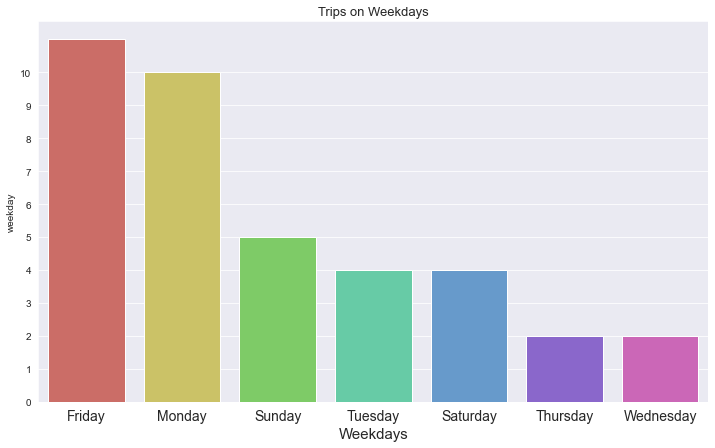

In [22]:
#trips on Weekdays- Show point estimates and confidence intervals as rectangular bars
plt.figure(figsize= (12,7))
plt.title('Trips on Weekdays',fontsize = 13)
f = sns.barplot(x = temp['index'], y = temp['weekday'], palette = 'hls')
f.set_xticklabels(labels = f.get_xticklabels(), fontdict={'fontsize':14})
plt.xlabel('Weekdays', fontsize = 15)
plt.yticks(list(range(max(temp['weekday']))))
plt.show()

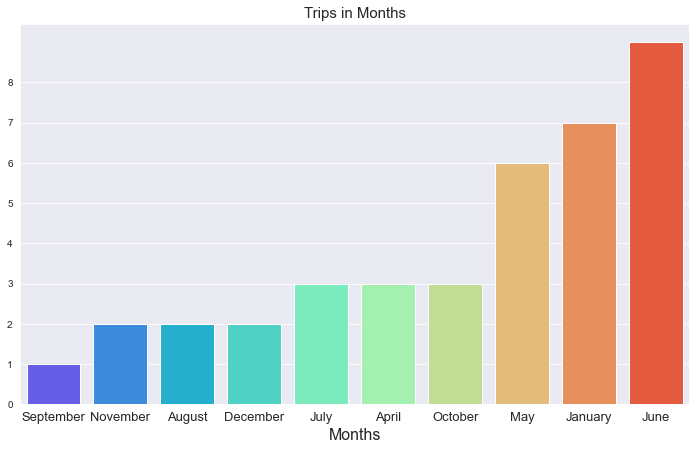

In [23]:
#trips in Months, Show point estimates and confidence intervals as rectangular bars
temp = dataset['trip_month'].value_counts()
plt.figure(figsize= (12,7))
plt.title('Trips in Months',fontsize = 15)
f = sns.barplot(x = temp.index[::-1], y = temp.values[::-1], palette = 'rainbow')
f.set_xticklabels(labels = f.get_xticklabels(), fontdict={'fontsize':13})
plt.xlabel('Months', fontsize = 16)
plt.yticks(list(range(max(temp))))
plt.show()

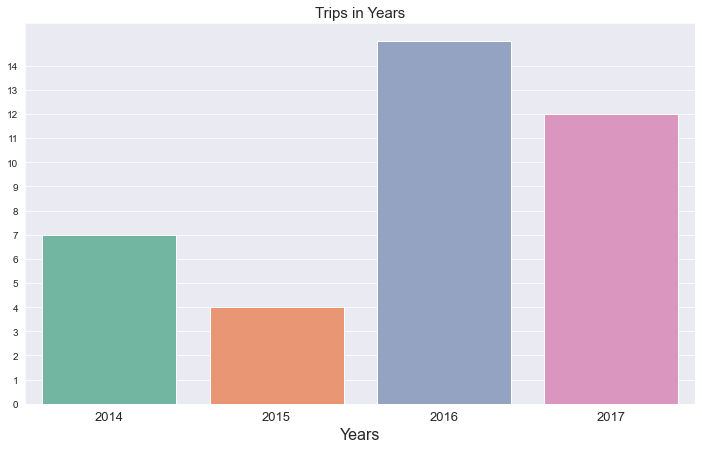

In [24]:
#trips in Years- Show point estimates and confidence intervals as rectangular bars 
temp = dataset['trip_year'].value_counts()
plt.figure(figsize= (12,7))
plt.title('Trips in Years',fontsize = 15)
f = sns.barplot(x = temp.index, y = temp.values, palette = 'Set2')
f.set_xticklabels(labels = f.get_xticklabels(), fontdict={'fontsize':13})
plt.xlabel('Years', fontsize = 16)
plt.yticks(list(range(max(temp))))
plt.show()

__Observing above Barplots, we can notice that most of faults occured during Summer season and only few during the winter.__

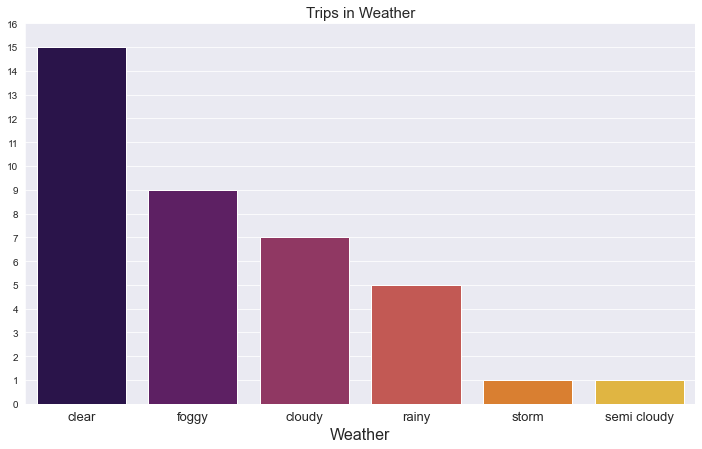

In [25]:
#from the above plot we can observe that most number of faults
#are during Summer season and tens to happen less during the winter months.
temp = dataset['weather'].value_counts()
#trips in Weather, Show point estimates and confidence intervals as rectangular bars
plt.figure(figsize= (12,7))
plt.title('Trips in Weather',fontsize = 15)
f = sns.barplot(x = temp.index, y = temp.values, palette = 'inferno')
f.set_xticklabels(labels = f.get_xticklabels(), fontdict={'fontsize':13})
plt.xlabel('Weather', fontsize = 16)
plt.yticks(list(range(0,max(temp)+2)))
plt.show()

__Observing the Weathre Barplot, we notice that the faults occur during Clear Skies.__

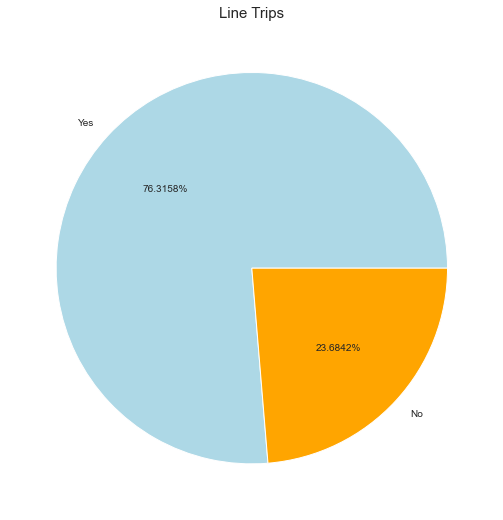

In [26]:
#Pie Plot 
temp = dataset['line_trip'].value_counts().reset_index()
plt.figure(figsize=(9,9))
f = plt.pie(x = temp['line_trip'],labels = ['Yes','No'], colors=('lightblue','orange'), autopct= "%1.4f%%")
plt.title('Line Trips', fontsize  = 15)
plt.show()

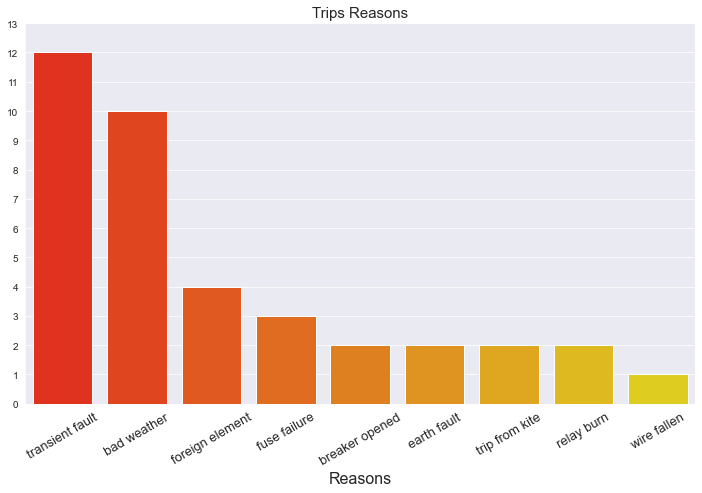

In [27]:
#rips reasons- comparing reasons using Histogram
temp = dataset['tripping_reason'].value_counts()
plt.figure(figsize= (12,7))
plt.title('Trips Reasons',fontsize = 15)
f = sns.barplot(x = temp.index, y = temp.values, palette = 'autumn')
f.set_xticklabels(labels = f.get_xticklabels(), fontdict={'fontsize':13}, rotation = 30)
plt.xlabel('Reasons', fontsize = 16)
plt.yticks(range(max(temp)+2))
plt.show()

__Observing above Trips Reasons Barplot, we notice that the faults reasons are due to transient_fault or bad_weather__

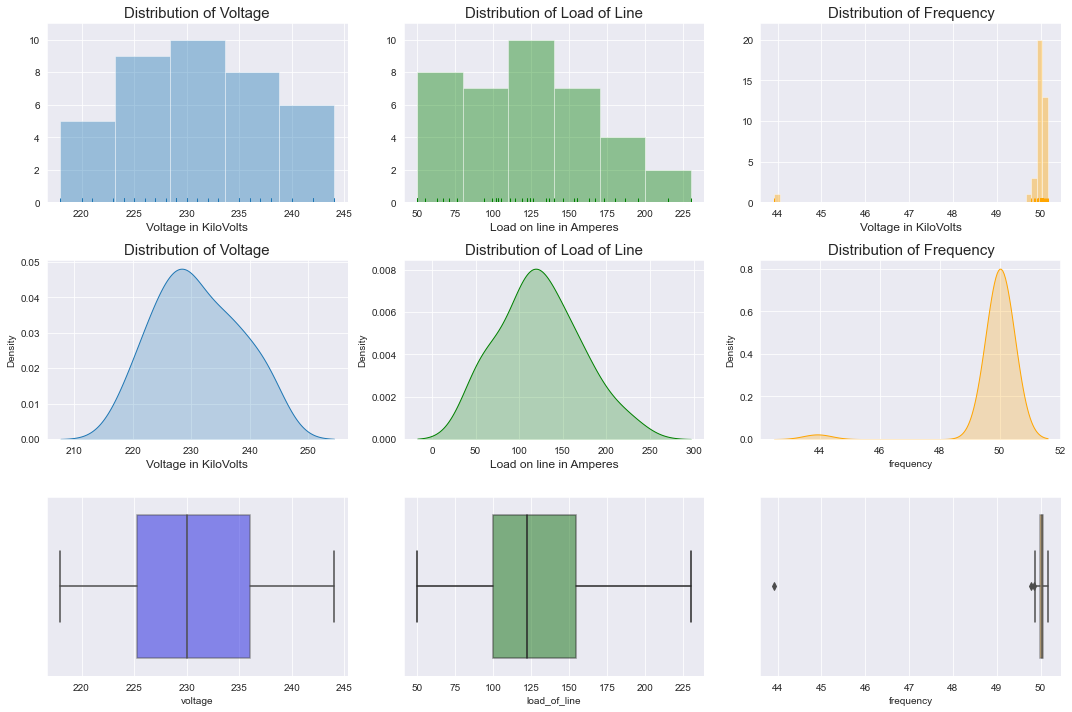

In [28]:
plt.figure(figsize= (15,10))
plt.subplot(3,3,1)
sns.distplot(dataset['voltage'], rug = True, kde = False)
plt.xlabel('Voltage in KiloVolts', fontsize = 12)
plt.title('Distribution of Voltage',fontsize = 15)
plt.subplot(3,3,2)
sns.distplot(dataset['load_of_line'], color= 'green',rug = True, kde = False)
plt.title('Distribution of Load of Line',fontsize = 15)
plt.xlabel('Load on line in Amperes', fontsize = 12)
plt.subplot(3,3,3)
sns.distplot(dataset['frequency'], rug= True, color= 'orange', kde = False)
plt.xlabel('Voltage in KiloVolts', fontsize = 12)
plt.title('Distribution of Frequency',fontsize = 15)
plt.subplot(3,3,4)
sns.kdeplot(dataset['voltage'], shade = True)
plt.xlabel('Voltage in KiloVolts', fontsize = 12)
plt.title('Distribution of Voltage',fontsize = 15)
plt.subplot(3,3,5)
sns.kdeplot(dataset['load_of_line'], shade = True, color = 'g')
plt.title('Distribution of Load of Line',fontsize = 15)
plt.xlabel('Load on line in Amperes', fontsize = 12)
plt.subplot(3,3,6)
sns.kdeplot(dataset['frequency'],shade= True, color = 'Orange')
plt.title('Distribution of Frequency',fontsize = 15)
plt.subplot(3,3,7)
sns.boxplot(x = dataset['voltage'], orient = 'v',color= 'b', boxprops=dict(alpha=.5))
plt.subplot(3,3,8)
sns.boxplot(x = dataset['load_of_line'], orient = 'v', color= 'g', boxprops=dict(alpha=.5))
plt.subplot(3,3,9)
sns.boxplot(x = dataset['frequency'], orient = 'v', color= 'Orange', boxprops=dict(alpha=.5))

plt.tight_layout()
plt.show()

__Observing above Histogram, Kernel & Box Plot, we notice that the Voltage and Current have considerable spread, wehere the Frequency has a little spread, and there is no sufficient amount of data to have outliers.__

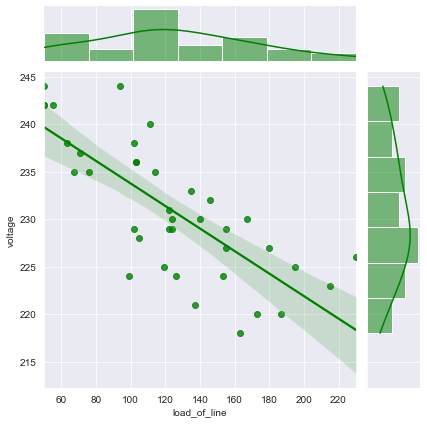

In [29]:
sns.jointplot(x = dataset['load_of_line'], y = dataset['voltage'], kind = 'reg', color= 'g')
plt.show()

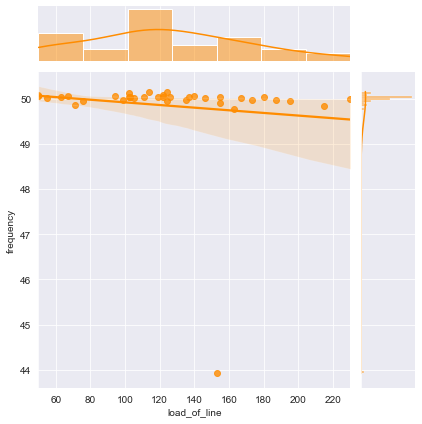

In [30]:
sns.jointplot(x = dataset['load_of_line'], y = dataset['frequency'], kind = 'reg', color= 'darkorange')
plt.show()

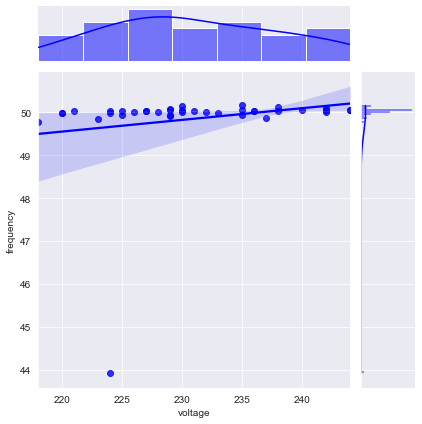

In [31]:
sns.jointplot(x = dataset['voltage'], y = dataset['frequency'], kind = 'reg', color = 'blue')
plt.show()

__Observing above "Versus Plots", we notice that the Voltage vs load_of_line shows strong negative correlation of -0.76. So we will drop it if the accuracy is not drastically effected. 
And for the "load_of_line vs frequency" & "voltage vs frequency" don't have any significant relationship.__

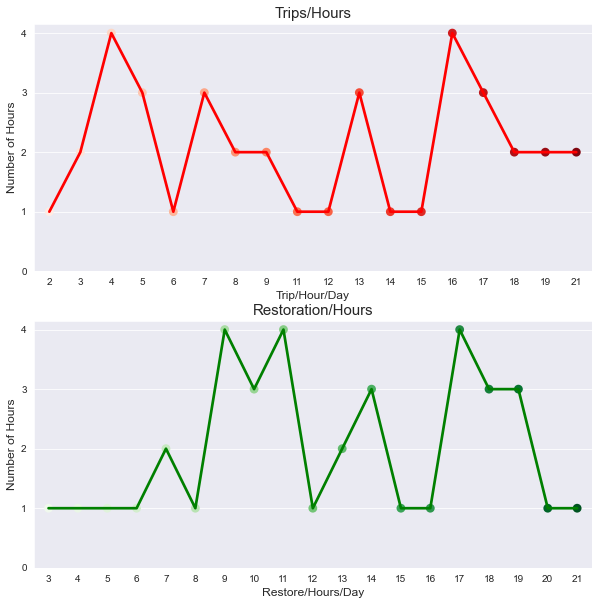

In [32]:
#a point plot represents an estimate of central tendency for a numeric variable
#by the position of scatter plot points and provides some indication of the uncertainty
#around that estimate using error bars.
temp = dataset['trip_hour'].value_counts()
plt.figure(figsize= (10,10))
plt.subplot(2,1,1)
sns.pointplot(x = temp.index, y = temp.values ,palette= 'Reds')
sns.pointplot(x = temp.index, y = temp.values ,join= True, color = 'r',markers = '')
plt.title('Trips/Hours',fontsize = 15)
plt.xlabel('Trip/Hour/Day', fontsize = 12)
plt.ylabel('Number of Hours', fontsize = 12)
plt.yticks([0,1,2,3,4])

temp = dataset['restore_hour'].value_counts()
plt.subplot(2,1,2)
sns.pointplot(x = temp.index, y = temp.values ,palette= 'Greens')
sns.pointplot(x = temp.index, y = temp.values ,join= True, color='g', markers = '')
plt.title('Restoration/Hours',fontsize = 15)
plt.xlabel('Restore/Hours/Day', fontsize = 12)
plt.ylabel('Number of Hours', fontsize = 12)
plt.yticks([0,1,2,3,4])
plt.show()

__Observing above Line Plots, the most fault peaks (plot 1 in red), has highest peak during early morning and dusk.  And again, there isn't sufficient pattern to consider.__

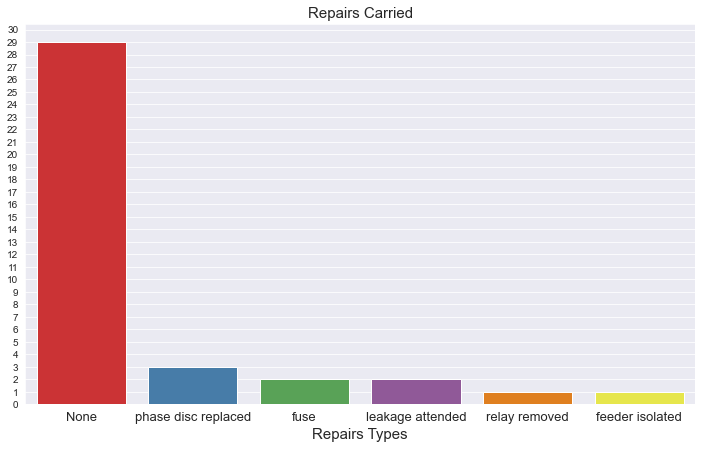

0                    None
1                    None
2                    None
3                    None
4         feeder isolated
5           relay removed
6                    None
7                    None
8                    None
9                    fuse
10                   fuse
11                   None
12                   None
13                   None
14                   None
15                   None
16                   None
17    phase disc replaced
18       leakage attended
19                   None
20    phase disc replaced
21    phase disc replaced
22                   None
23                   None
24                   None
25                   None
26                   None
27                   None
28                   None
29       leakage attended
30                   None
31                   None
32                   None
33                   None
34                   None
35                   None
36                   None
37                   None
Name: repair

In [33]:
#for loop starting @ 0 ends @ "repair carried" length
#if repair_carried == nil then replace with None
for i in range(0,len(dataset['repair_carried'])):
    if dataset['repair_carried'][i] == 'nil':
        dataset['repair_carried'][i] = 'None'
temp = dataset['repair_carried'].value_counts()
plt.figure(figsize= (12,7))
plt.title('Repairs Carried',fontsize = 15)
f = sns.barplot(x = temp.index, y = temp.values, palette = 'Set1')
f.set_xticklabels(labels = f.get_xticklabels(), fontdict={'fontsize':13})
plt.xlabel('Repairs Types', fontsize = 15)
plt.yticks(range(max(temp)+2))
plt.show()
# Verify result of the for loop
ef_X = dataset.repair_carried
print(ef_X)

__Observing above "Repairs Carried", it is noticable that mostly, there were no repairs done.  And it's directly proportional to "no faults".   So we can rule it out.__

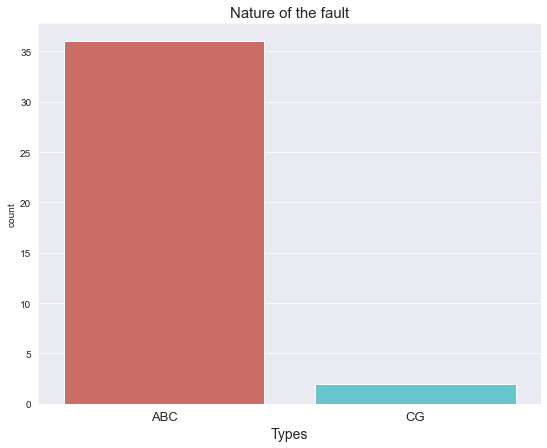

In [34]:
#"Nature" of the Fault
plt.figure(figsize= (9,7))
plt.title('Nature of the fault',fontsize = 15)
f = sns.countplot(dataset['nature'], palette= 'hls')
f.set_xticklabels(labels = f.get_xticklabels(), fontdict={'fontsize':13})
plt.xlabel("Types", fontsize= 14)
plt.show()

__Visualizing above "Nature" of the fault, we notice that there is no sufficient data to classify this feature.__

In [35]:
b_line_trip = print("The shape of the data is :",dataset['line_trip'])

The shape of the data is : 0     yes
1     yes
2     yes
3     yes
4     yes
5      no
6     yes
7     yes
8     yes
9      no
10     no
11     no
12    yes
13     no
14    yes
15     no
16    yes
17    yes
18     no
19    yes
20    yes
21    yes
22    yes
23    yes
24    yes
25    yes
26    yes
27    yes
28    yes
29     no
30    yes
31    yes
32    yes
33    yes
34    yes
35    yes
36     no
37    yes
Name: line_trip, dtype: object


__Mapping the line_trip feature and Converting it from categorical to numerical__

In [36]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
encoder = LabelEncoder()
dataset['line_trip'] = encoder.fit_transform(dataset['line_trip'])
dataset['line_trip'].value_counts()
dataset['type_of_fault'] = encoder.fit_transform(dataset['type_of_fault'])
dataset['type_of_fault'].value_counts()

2    17
0    11
1    10
Name: type_of_fault, dtype: int64

In [37]:
#check the conversion
dataset.line_trip

0     1
1     1
2     1
3     1
4     1
5     0
6     1
7     1
8     1
9     0
10    0
11    0
12    1
13    0
14    1
15    0
16    1
17    1
18    0
19    1
20    1
21    1
22    1
23    1
24    1
25    1
26    1
27    1
28    1
29    0
30    1
31    1
32    1
33    1
34    1
35    1
36    0
37    1
Name: line_trip, dtype: int64

# Mapping the Target Class

    Mapping the type_of_fault to integer values:
    -1 - Low Fault
     0 - Medium Fault
     1 - High Fault

In [38]:
dataset

,date_of_trip,time_of_trip,weather,line_trip,load_of_line,voltage,frequency,date of restoration,time_of_restoration,repair_carried,tripping_reason,type_of_fault,nature,trip_year,restore_year,trip_month,restore_month,trip_hour,restore_hour,weekday
0,08-11-2017,5:39,cloudy,1,71,237,49.87,08-11-2017,7:50,None,bad weather,1,ABC,2017,2017,November,November,5,7,Friday
1,10-05-2017,15:56,cloudy,1,187,220,49.98,10-05-2017,16:34,None,transient fault,0,ABC,2017,2017,May,May,15,16,Thursday
2,11-10-2017,12:35,clear,1,124,229,49.94,11-10-2017,13:45,None,foreign element,2,ABC,2017,2017,October,October,12,13,Friday
3,18-06-2017,5:37,clear,1,105,228,50.01,18-06-2017,6:17,None,foreign element,2,ABC,2017,2017,June,June,5,6,Sunday
4,19-06-2017,6:30,rainy,1,102,229,50.05,19-06-2017,7:18,feeder isolated,transient fault,2,ABC,2017,2017,June,June,6,7,Monday
5,20-06-2017,17:04,cloudy,0,137,221,50.03,20-06-2017,17:10,relay removed,relay burn,2,ABC,2017,2017,June,June,17,17,Tuesday
6,24-07-2017,11:32,cloudy,1,173,220,49.98,24-07-2017,12:07,None,transient fault,0,ABC,2017,2017,July,July,11,12,Monday
7,29-06-2017,13:51,cloudy,1,180,227,50.03,29-06-2017,14:39,None,foreign element,0,ABC,2017,2017,June,June,13,14,Thursday
8,31-12-2017,7:38,foggy,1,67,235,50.06,31-12-2017,9:26,None,bad weather,1,ABC,2017,2017,December,December,7,9,Sunday
9,11-06-2017,3:49,clear,0,146,232,50.01,11-06-2017,4:20,fuse,fuse failure,2,ABC,2017,2017,June,June,3,4,Monday


__Due to small size of data and unsufficient evidence in some of the features, choosing lot of features will increase the chances of overfitting.  So I decide limit our features to "line_trip", "load_of_line" and "frequency"__

# Split Data into Features and Target

In [39]:
X_full = dataset.iloc[:, [3,4,6]].values
y_full = dataset['type_of_fault'].values

In [40]:
X_full

array([[  1.  ,  71.  ,  49.87],
       [  1.  , 187.  ,  49.98],
       [  1.  , 124.  ,  49.94],
       [  1.  , 105.  ,  50.01],
       [  1.  , 102.  ,  50.05],
       [  0.  , 137.  ,  50.03],
       [  1.  , 173.  ,  49.98],
       [  1.  , 180.  ,  50.03],
       [  1.  ,  67.  ,  50.06],
       [  0.  , 146.  ,  50.01],
       [  0.  , 135.  ,  49.98],
       [  0.  , 122.  ,  50.03],
       [  1.  , 140.  ,  50.06],
       [  0.  , 230.  ,  50.  ],
       [  1.  , 155.  ,  49.91],
       [  0.  , 215.  ,  49.85],
       [  1.  , 195.  ,  49.94],
       [  1.  ,  76.  ,  49.94],
       [  0.  , 103.  ,  50.03],
       [  1.  , 114.  ,  50.16],
       [  1.  ,  50.  ,  50.06],
       [  1.  ,  94.  ,  50.06],
       [  1.  , 126.  ,  50.03],
       [  1.  , 124.  ,  50.15],
       [  1.  ,  55.  ,  50.02],
       [  1.  , 122.  ,  50.08],
       [  1.  ,  63.  ,  50.03],
       [  1.  , 102.  ,  50.13],
       [  1.  , 163.  ,  49.77],
       [  0.  , 103.  ,  50.03],
       [  

In [41]:
y_full

array([1, 0, 2, 2, 2, 2, 0, 0, 1, 2, 2, 2, 2, 0, 0, 0, 0, 1, 2, 2, 1, 1,
       2, 2, 1, 2, 1, 2, 0, 2, 0, 1, 1, 0, 2, 1, 2, 0])

# Scaling the Data
     standardize features by removing the mean and scaling to unit variance

In [42]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_full)
X_full = sc.transform(X_full)

In [43]:
X_full

array([[ 5.57086015e-01, -1.14916316e+00,  1.77543488e-02],
       [ 5.57086015e-01,  1.40273166e+00,  1.30198558e-01],
       [ 5.57086015e-01,  1.67887818e-02,  8.93097545e-02],
       [ 5.57086015e-01, -4.01193992e-01,  1.60865160e-01],
       [ 5.57086015e-01, -4.67191272e-01,  2.01753963e-01],
       [-1.79505494e+00,  3.02776995e-01,  1.81309562e-01],
       [ 5.57086015e-01,  1.09474436e+00,  1.30198558e-01],
       [ 5.57086015e-01,  1.24873801e+00,  1.81309562e-01],
       [ 5.57086015e-01, -1.23715954e+00,  2.11976164e-01],
       [-1.79505494e+00,  5.00768835e-01,  1.60865160e-01],
       [-1.79505494e+00,  2.58778808e-01,  1.30198558e-01],
       [-1.79505494e+00, -2.72094049e-02,  1.81309562e-01],
       [ 5.57086015e-01,  3.68774275e-01,  2.11976164e-01],
       [-1.79505494e+00,  2.34869268e+00,  1.50642959e-01],
       [ 5.57086015e-01,  6.98760675e-01,  5.86431520e-02],
       [-1.79505494e+00,  2.01870628e+00, -2.69005284e-03],
       [ 5.57086015e-01,  1.57872441e+00

# Split Data into Train and Test

In [44]:
from sklearn.model_selection import train_test_split
#splitting the data into 75% Train set and 25% Test Set
X_train, X_test, y_train, y_test = train_test_split(X_full, y_full, test_size = 0.25, random_state = 1)
X_train

array([[ 5.57086015e-01,  6.54762488e-01, -6.06445513e+00],
       [ 5.57086015e-01, -1.03916770e+00,  8.93097545e-02],
       [ 5.57086015e-01,  8.74753422e-01, -8.44676593e-02],
       [ 5.57086015e-01, -9.32066849e-02,  1.81309562e-01],
       [ 5.57086015e-01, -1.61114412e+00,  2.11976164e-01],
       [ 5.57086015e-01, -1.32515591e+00,  1.81309562e-01],
       [ 5.57086015e-01, -4.67191272e-01,  2.01753963e-01],
       [ 5.57086015e-01,  6.98760675e-01,  5.86431520e-02],
       [-1.79505494e+00,  2.58778808e-01,  1.30198558e-01],
       [ 5.57086015e-01,  6.98760675e-01,  1.91531763e-01],
       [ 5.57086015e-01,  1.67887818e-02,  3.03975971e-01],
       [ 5.57086015e-01, -1.61114412e+00,  2.42642767e-01],
       [ 5.57086015e-01, -1.61114412e+00,  2.11976164e-01],
       [-1.79505494e+00, -4.45192178e-01,  1.81309562e-01],
       [ 5.57086015e-01,  1.09474436e+00,  1.30198558e-01],
       [-1.79505494e+00,  2.34869268e+00,  1.50642959e-01],
       [ 5.57086015e-01,  1.24873801e+00

In [45]:
y_train

array([0, 1, 0, 2, 1, 1, 2, 0, 2, 0, 2, 1, 1, 2, 0, 0, 0, 2, 0, 0, 1, 0,
       2, 2, 2, 1, 2, 0])

In [46]:
#save model in output directory
#from sklearn.pipeline import Pipeline
#pipe = Pipeline([('scaler', StandardScaler()), ('KNeighborsClassifier', KNeighborsClassifier())])
#pipe.fit(X_train,y_train)

# Model Creation

In [47]:
#from sklearn.neighbors import KNeighborsClassifier
#model = KNeighborsClassifier()

# Create a standard pipeline out of scaler and classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
#model = make_pipeline(StandardScaler(), KNeighborsClassifier())
model = Pipeline([('scaler', StandardScaler()), ('KNeighborsClassifier', KNeighborsClassifier())])

# Training

In [48]:
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9

In [49]:
X_train

array([[ 5.57086015e-01,  6.54762488e-01, -6.06445513e+00],
       [ 5.57086015e-01, -1.03916770e+00,  8.93097545e-02],
       [ 5.57086015e-01,  8.74753422e-01, -8.44676593e-02],
       [ 5.57086015e-01, -9.32066849e-02,  1.81309562e-01],
       [ 5.57086015e-01, -1.61114412e+00,  2.11976164e-01],
       [ 5.57086015e-01, -1.32515591e+00,  1.81309562e-01],
       [ 5.57086015e-01, -4.67191272e-01,  2.01753963e-01],
       [ 5.57086015e-01,  6.98760675e-01,  5.86431520e-02],
       [-1.79505494e+00,  2.58778808e-01,  1.30198558e-01],
       [ 5.57086015e-01,  6.98760675e-01,  1.91531763e-01],
       [ 5.57086015e-01,  1.67887818e-02,  3.03975971e-01],
       [ 5.57086015e-01, -1.61114412e+00,  2.42642767e-01],
       [ 5.57086015e-01, -1.61114412e+00,  2.11976164e-01],
       [-1.79505494e+00, -4.45192178e-01,  1.81309562e-01],
       [ 5.57086015e-01,  1.09474436e+00,  1.30198558e-01],
       [-1.79505494e+00,  2.34869268e+00,  1.50642959e-01],
       [ 5.57086015e-01,  1.24873801e+00

In [50]:
X_test

array([[ 0.55708601,  0.01678878,  0.08930975],
       [-1.79505494, -0.44519218,  0.18130956],
       [ 0.55708601, -0.40119399,  0.16086516],
       [ 0.55708601,  0.06078697,  0.18130956],
       [ 0.55708601, -0.0272094 ,  0.23242057],
       [ 0.55708601, -0.46719127,  0.28353157],
       [ 0.55708601, -0.64318402,  0.21197616],
       [ 0.55708601, -0.53318855,  0.13019856],
       [ 0.55708601, -0.20320215,  0.31419817],
       [ 0.55708601, -1.50114866,  0.17108736]])

# Predicting

In [51]:
predictions = model.predict(X_test)

In [52]:
predictions[:10]

array([2, 2, 2, 2, 2, 2, 1, 2, 2, 1])

# Scoring

In [53]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.9
[[2 1]
 [0 7]]
              precision    recall  f1-score   support

           1       1.00      0.67      0.80         3
           2       0.88      1.00      0.93         7

    accuracy                           0.90        10
   macro avg       0.94      0.83      0.87        10
weighted avg       0.91      0.90      0.89        10



In [54]:
#Accuracy on Train Set
from sklearn.metrics import classification_report
print(classification_report(y_train, model.predict(X_train)))

              precision    recall  f1-score   support

           0       1.00      0.82      0.90        11
           1       1.00      1.00      1.00         7
           2       0.83      1.00      0.91        10

    accuracy                           0.93        28
   macro avg       0.94      0.94      0.94        28
weighted avg       0.94      0.93      0.93        28



In [55]:
#Accuracy on Test Set
cr = classification_report(y_test, predictions)
print(cr)

              precision    recall  f1-score   support

           1       1.00      0.67      0.80         3
           2       0.88      1.00      0.93         7

    accuracy                           0.90        10
   macro avg       0.94      0.83      0.87        10
weighted avg       0.91      0.90      0.89        10



In [56]:
train_scores = []
test_scores = []
k_vals = []

for k in range(1, 10):
    k_vals.append(k)
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    
    tr_score = knn.score(X_train, y_train)
    train_scores.append(tr_score)
    
    te_score = knn.score(X_test, y_test)
    test_scores.append(te_score)

'''
for i in range(1,15):
    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))
'''

'\nfor i in range(1,15):\n    knn = KNeighborsClassifier(i)\n    knn.fit(X_train,y_train)\n    train_scores.append(knn.score(X_train,y_train))\n    test_scores.append(knn.score(X_test,y_test))\n'

In [57]:
train_scores

[1.0,
 0.9642857142857143,
 1.0,
 0.9642857142857143,
 0.9285714285714286,
 0.8571428571428571,
 0.8928571428571429,
 0.8571428571428571,
 0.8214285714285714]

In [58]:
test_scores

[0.8, 0.9, 0.9, 0.9, 0.9, 0.9, 1.0, 0.5, 0.5]

In [59]:
#score that comes from testing on the same datapoints that were used for training
max_train_score = max(train_scores)
max_train_score

1.0

In [60]:
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))
#Max train score 100.0 % and k = [1]

Max train score 100.0 % and k = [1, 3]


In [61]:
## score that comes from testing on the datapoints that were split in the beginning to be used for testing solely
max_test_score = max(test_scores)
print(max_test_score)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

1.0
Max test score 100.0 % and k = [7]


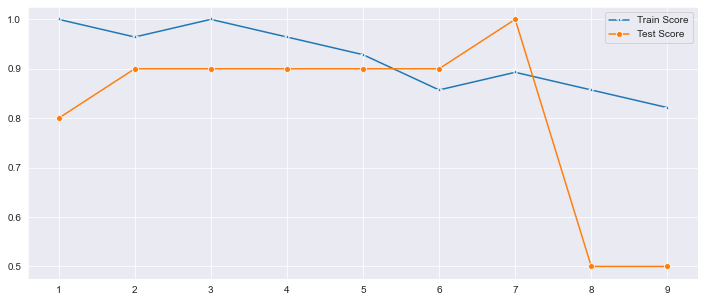

In [62]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,10),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,10),test_scores,marker='o',label='Test Score')

In [63]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(11)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.4

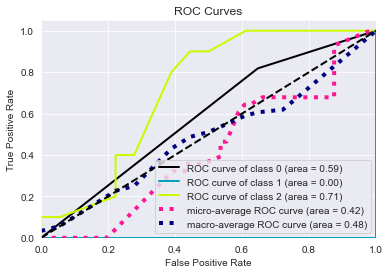

In [64]:
# ROC and AUC Curves: X_train, X_test, y_train, y_test, y_test_pred
#y_true = y_full# ground truth labels
y_true = y_train
#y_probas = X_full# predicted probabilities generated by sklearn classifier
y_probas = X_train
skplt.metrics.plot_roc_curve(y_true, y_probas)
plt.show()

In [65]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver= 'newton-cg',multi_class= 'multinomial')
classifier.fit(X_train, y_train)

model2 = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)

y_test_pred = classifier.predict(X_test)

model2 = LogisticRegression(random_state=0, multi_class='multinomial', penalty='none',
                             solver='newton-cg').fit(X_train, y_train)
preds = model2.predict(X_test)

#print the tunable parameters (They were not tuned in this example, everything kept as default)
params = model2.get_params()
print(params)

#Accuracy on Train Test
print(classification_report(y_train, classifier.predict(X_train)))

# So we got approximately 94% accuracy on the train set.
# Accuracy on Test Set

#from sklearn.metrics import classification_report
#cr = classification_report(y_test, y_test_pred)
cr = classification_report(y_test, preds)
print(cr)

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'multinomial', 'n_jobs': None, 'penalty': 'none', 'random_state': 0, 'solver': 'newton-cg', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        11
           1       0.88      1.00      0.93         7
           2       1.00      0.80      0.89        10

    accuracy                           0.93        28
   macro avg       0.93      0.93      0.93        28
weighted avg       0.94      0.93      0.93        28

              precision    recall  f1-score   support

           1       1.00      0.33      0.50         3
           2       0.78      1.00      0.88         7

    accuracy                           0.80        10
   macro avg       0.89      0.67      0.69        10
weighted avg       0.84      0.80      0.76        10



Text(0.5, 16.0, 'Predicted label')

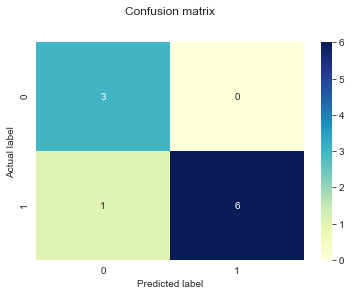

In [66]:
# confusion_matrix
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_test_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

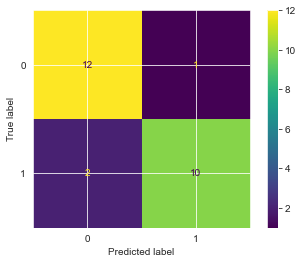

In [67]:
# confusion matrix
X_full, ef_y_train = make_classification(random_state=0)
X_full, ef_y_train = make_classification(random_state=0)
n_X_full, X_test, n_ef_y_train, y_test = train_test_split(X_full, ef_y_train, random_state=0)
clf = SVC(random_state=0)
clf.fit(n_X_full, n_ef_y_train)
SVC(random_state=0)
#plot_confusion_matrix(clf, X_test, y_test)
plot_confusion_matrix(clf, X_test, y_test)  
plt.show()

# Saving Model

In [76]:
#save model in output directory
#from sklearn.pipeline import Pipeline
#pipe = Pipeline([('scaler', StandardScaler()), ('KNeighborsClassifier', KNeighborsClassifier())])
#pipe.fit(X_train,y_train)

import joblib
joblib .dump(sc, 'E_Fault_sc.pkl')
print('E_Fault_sc.pkl')

joblib.dump(model, 'E_Fault_model.pkl')
print('E_Fault_model.pkl')
'''
# save to json file
fn= "e_Fault.json"

with open(fn,"w") as writebuf:
    json.dump(data, writebuf)

#with codecs.open('ismvInfo.json', 'w', encoding='utf-8') as f:
#        json.dump(ismvInfo, f)
'''

'''
import json
class_dict = {'Normal':0, 'Prone to E_Fault':1}
with open("E_Fault.json","w") as f:
    f.write(json.dumps(class_dict))
'''

E_Fault_sc.pkl
E_Fault_model.pkl


'\nimport json\nclass_dict = {\'Normal\':0, \'Prone to E_Fault\':1}\nwith open("E_Fault.json","w") as f:\n    f.write(json.dumps(class_dict))\n'

# Predict with New Data

In [69]:
# So we got approximately 91% accuracy on the train set.
# To check for single observation
# =============================================================================
#   
# ---------------------------------------------------------------------------
# StdinNotImplementedError                  Traceback (most recent call last)
# <ipython-input-42-c0ddcd40da7c> in <module>()
# ----> 1 t = input("Enter Trip\t")
#       2 l = float(input("Enter load of line\t"))
#       3 f = float(input("Enter Frequency\t"))
#       4 
#       5 if t =='yes':
# /opt/conda/lib/python3.6/site-packages/ipykernel/kernelbase.py in raw_input(self, prompt)
#     697         if not self._allow_stdin:
#     698             raise StdinNotImplementedError(
# --> 699                 "raw_input was called, but this frontend does not support input requests."
#     700             )
#     701         return self._input_request(str(prompt),
# 
# StdinNotImplementedError: raw_input was called, but this frontend does not support input requests.
# Using Multinomial Logistic Regression'''
# 
# =============================================================================

t = input("Enter Trip\t")
l = float(input("Enter load of line\t"))
f = float(input("Enter Frequency\t"))

#def low(s):
#    s = s.lower()
#    if s == “no”:
#      return “-1”

if t =='yes':
    t = 1
elif t == 'no':
    t = 0
#elif t == 'enter':
#    t = -1
    
samp = np.array([[str(t), float(l), float(f)]])
print(samp)
#samp = sc.transform(samp)
#print(samp)
res = model.predict(samp)
print("\n------Sample-----\n", samp)
print("\n------Sample-----\n", res)
print("\n------Output-----\n")
if res <= -1:
    print("Low Fault")
elif res == 0:
    print("Medium Fault")
else:
    print("High Fault")

Enter Trip	 yes
Enter load of line	 1
Enter Frequency	 34


[['1' '1.0' '34.0']]

------Sample-----
 [['1' '1.0' '34.0']]

------Sample-----
 [2]

------Output-----

High Fault


# Load Trained Model

In [77]:
'''
fn= "e_Fault.json"

with open(fn,"r") as readbuf:
    my_loaded_json_data=json.load(readbuf)

print(e_Fault)
    
'''
#declare path where you saved your model
outFileFolder = '/Users/saseng/AML/My-Projects/Electric Fault/eFault/'
filePath = outFileFolder + 'E_Fault_model.pkl'
#open file
file = open(filePath, "rb")
#load the trained model
trained_model = joblib.load(file)

filePath = outFileFolder + 'E_Fault_sc.pkl'
#open file
file = open(filePath, "rb")
#load the trained model
trained_sc = joblib.load(file)

# Predict with Trained Model

In [78]:
t = input("Enter Trip\t")
l = float(input("Enter load of line\t"))
f = float(input("Enter Frequency\t"))

#def low(s):
#    s = s.lower()
#    if s == “no”:
#      return “-1”

if t =='yes':
    t = 1
elif t == 'no':
    t = 0
#elif t == 'enter':
#    t = -1
    
samp = np.array([[str(t), float(l), float(f)]])
print(samp)
samp = trained_sc.transform(samp)
print(samp)
res = trained_model.predict(samp)
print("\n------Sample-----\n", samp)
print("\n------Sample-----\n", res)
print("\n------Output-----\n")
if res <= -1:
    print("Low Fault")
elif res == 0:
    print("Medium Fault")
else:
    print("High Fault")

Enter Trip	 no
Enter load of line	 1
Enter Frequency	 23


[['0' '1.0' '23.0']]
[[ -1.79505494  -2.6890997  -27.44929923]]

------Sample-----
 [[ -1.79505494  -2.6890997  -27.44929923]]

------Sample-----
 [0]

------Output-----

Medium Fault


In [72]:
#import requests
#import pickle

#with open('E_Fault_model.pkl', 'rb') as f:
#    x = pickle.load(f)

#url = "http://127.0.0.1:5000/"

# the object I want to send is the 'model' object
#data = pickle.dumps(E_Fault_model)

#r = requests.post(url,data=data)